In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("C:/Users/Dhanesh/Downloads/Final_Project/Influencer.csv")

df['Country Or Region'] = df['Country Or Region'].fillna(df['Country Or Region'].mode()[0])

In [2]:
def convert(value):
    if 'm' in value:
        numeric_value = float(value.replace('m', '')) * 1000000
        float(numeric_value)
    elif 'k' in value:
        numeric_value = float(value.replace('k', '')) * 1000
        float(numeric_value)
    elif 'b' in value:
        numeric_value = float(value.replace('b', '')) * 1000000000
        float(numeric_value)
    else:
        numeric_value = float(value)
        float(numeric_value)
    return numeric_value


for i in range(len(df['Avg. Likes'])):
    df.iloc[i,df.columns.get_loc('Avg. Likes')]=convert(df.iloc[i,df.columns.get_loc('Avg. Likes')])


for i in range(len(df['Posts'])):
    df.iloc[i,df.columns.get_loc('Posts')]=convert(df.iloc[i,df.columns.get_loc('Posts')])

for i in range(len(df['Followers'])):
    df.iloc[i,df.columns.get_loc('Followers')]=convert(df.iloc[i,df.columns.get_loc('Followers')])


for i in range(len(df['Total Likes'])):
    df.iloc[i,df.columns.get_loc('Total Likes')]=convert(df.iloc[i,df.columns.get_loc('Total Likes')])

for i in range(len(df['New Post Avg. Likes'])):
    df.iloc[i,df.columns.get_loc('New Post Avg. Likes')]=convert(df.iloc[i,df.columns.get_loc('New Post Avg. Likes')])

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Channel Info'] = label_encoder.fit_transform(df['Channel Info'])
df['Country Or Region'] = label_encoder.fit_transform(df['Country Or Region'])

In [4]:
#------------------changing objects to numeric -----------------
df['Followers'] = pd.to_numeric(df['Followers'])
df['Avg. Likes'] = pd.to_numeric(df['Avg. Likes'])
df['Posts'] = pd.to_numeric(df['Posts'])
df['New Post Avg. Likes'] = pd.to_numeric(df['New Post Avg. Likes'])
df['Total Likes'] = pd.to_numeric(df['Total Likes'])

In [5]:
#--------------------    Q1     -------------------------------------------

correlation_matrix = df.corr()
correlated_features = set()
correlation_threshold = 0.7
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlation_coefficient = correlation_matrix.iloc[i, j]
            correlated_features.add((colname_i, colname_j, correlation_coefficient))

print("Q1.")
print("Below are the correlated features along with their coefficients")
print(correlated_features)

Q1.
Below are the correlated features along with their coefficients
{('New Post Avg. Likes', 'Avg. Likes', 0.8927840403263658), ('60-Day Eng Rate', 'Avg. Likes', 0.7893592803922145), ('New Post Avg. Likes', '60-Day Eng Rate', 0.8662931596052071)}


In [7]:
#------------------------------Question 2 -------------------------------------

print("Q2. Frequency distributions of below and also graphs are plotted")
print(df['Influence Score'].value_counts())

Q2. Frequency distributions of below and also graphs are plotted
Influence Score
85    30
83    20
86    19
84    18
82    12
80    12
87     9
81     9
90     7
88     7
76     6
79     6
91     6
78     5
77     4
92     4
75     4
89     4
74     3
73     2
42     2
70     1
93     1
22     1
57     1
58     1
47     1
72     1
68     1
41     1
71     1
63     1
Name: count, dtype: int64


In [8]:
print(df['Followers'].value_counts())

Followers
36000000.0    3
33600000.0    3
68100000.0    3
33800000.0    3
52900000.0    3
             ..
64700000.0    1
64400000.0    1
63600000.0    1
63400000.0    1
33400000.0    1
Name: count, Length: 172, dtype: int64


In [9]:
print(df['Posts'].value_counts())

Posts
10000.0    11
1200.0      9
1900.0      5
2000.0      5
9900.0      4
           ..
899.0       1
290.0       1
10100.0     1
8200.0      1
3800.0      1
Name: count, Length: 121, dtype: int64


lets see in graphical form...........


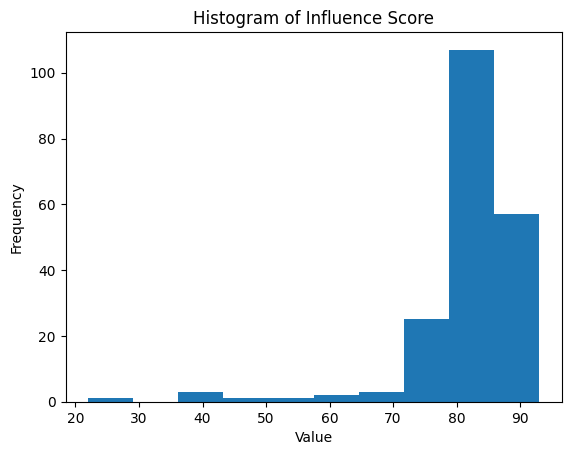

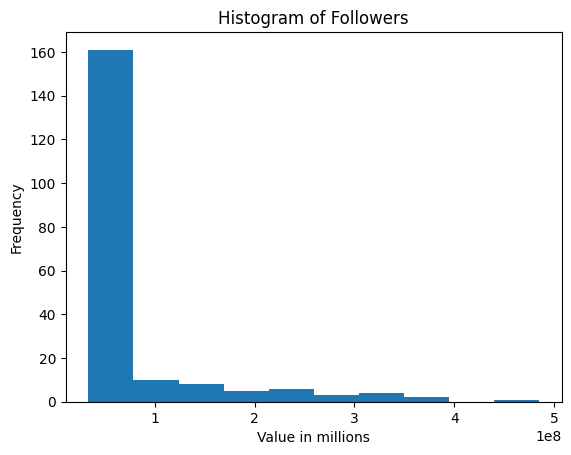

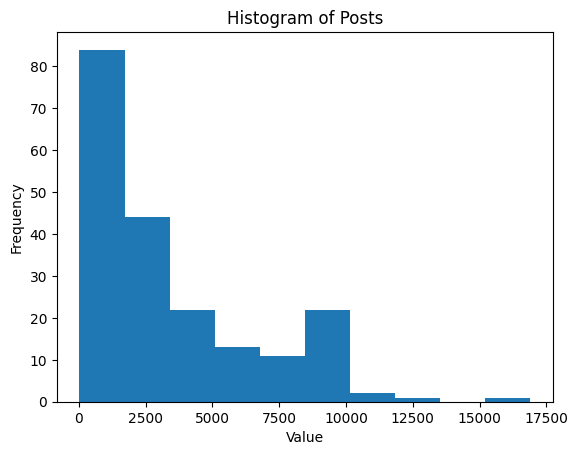

In [10]:
print("lets see in graphical form...........")
plt.hist(df['Influence Score'])
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Influence Score')

# Display the plot
plt.show()

plt.hist(df['Followers'])

# Add labels and title
plt.xlabel('Value in millions')
plt.ylabel('Frequency')
plt.title('Histogram of Followers')

# Display the plot
plt.show()

plt.hist(df['Posts'])

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Posts')

# Display the plot
plt.show()

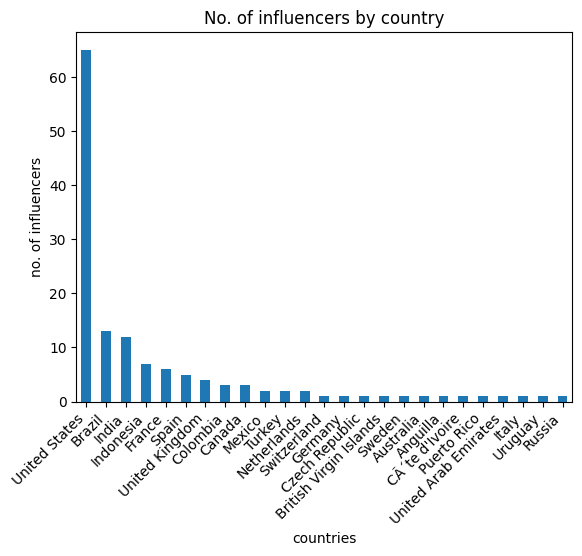

In [11]:
df1=pd.read_csv("C:/Users/Dhanesh/Downloads/Final_Project/Influencer.csv")

country_count=df1['Country Or Region'].value_counts()

country_count.plot.bar()
plt.xticks(rotation=45, ha='right')
plt.xlabel('countries')
plt.ylabel('no. of influencers')
plt.title('No. of influencers by country')
plt.show()

In [12]:
#------------           Q4               ------------------------------------
sorted_df_followers = df1.sort_values('Followers',ascending=False)

print("Top 10 influencers by followers:")
print(sorted_df_followers['Channel Info'][:10].str.strip('\\\n'))
print("---------------------------------------------------------")

sorted_df_avglikes = df1.sort_values('Avg. Likes',ascending=False)
# print(sorted_df_followers.to_string())

print("Top 10 influencers by avg. likes:")
print(sorted_df_avglikes['Channel Info'][:10].str.strip('\\\n'))
print("---------------------------------------------------------")
sorted_df_tlikes = df1.sort_values('Total Likes',ascending=False)
# print(sorted_df_followers.to_string())

print("Top 10 influencers by total likes:")
print(sorted_df_tlikes['Channel Info'][:10].str.strip('\\\n'))
print("-------------------------------------------------------------")

Top 10 influencers by followers:
33         gal_gadot
34           dualipa
35         vindiesel
36              nasa
37    priyankachopra
38      lalalalisa_m
39         snoopdogg
40           Shakira
41         gigihadid
42      davidbeckham
Name: Channel Info, dtype: object
---------------------------------------------------------
Top 10 influencers by avg. likes:
27          realmadrid
171             eminem
146       ranveersingh
89         sergioramos
40             Shakira
86         tatawerneck
137    brunamarquezine
99          kritisanon
95                 433
53          ronaldinho
Name: Channel Info, dtype: object
---------------------------------------------------------
Top 10 influencers by total likes:
132      hrithikroshan
197          raisa6690
170      antogriezmann
8      khloekardashian
68              maluma
119        travisscott
29       champagnepapi
95                 433
125    vancityreynolds
144               dior
Name: Channel Info, dtype: object
----------

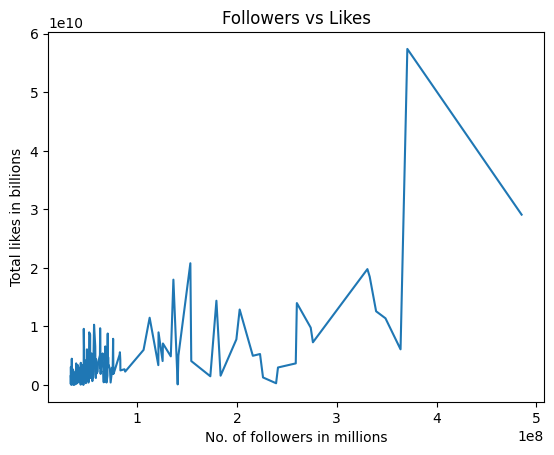

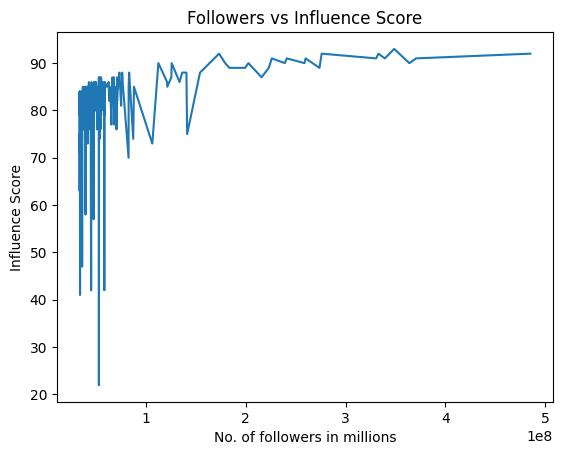

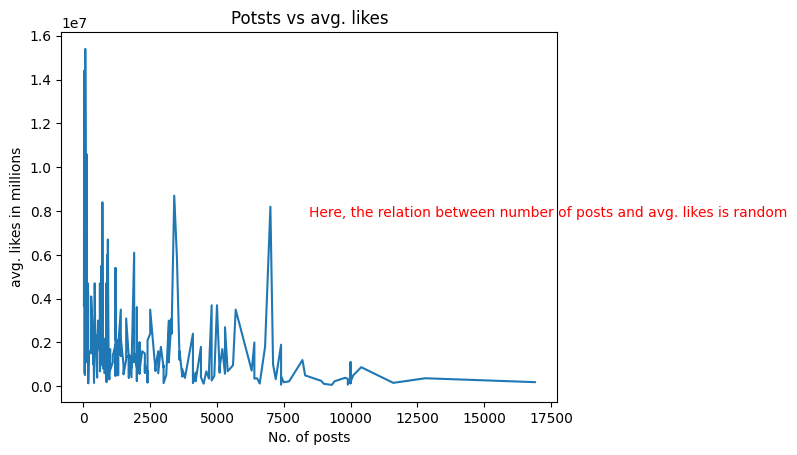

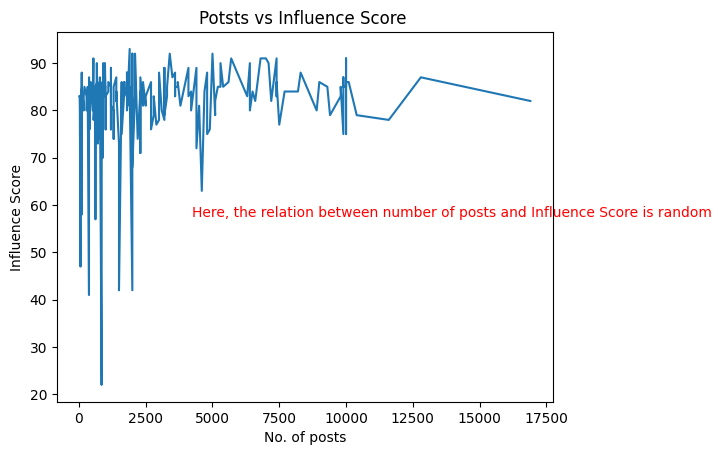

In [13]:
#----------------------------------Q5      -----------------
sorted_df_followers_charts = df.sort_values('Followers')#,ascending=False)
plt.plot(sorted_df_followers_charts['Followers'], sorted_df_followers_charts['Total Likes'])

plt.xlabel('No. of followers in millions')
plt.ylabel('Total likes in billions')
plt.title('Followers vs Likes')

plt.show()
#--------------------------------
sorted_df_followers_charts_vs_score = df.sort_values('Followers')#,ascending=False)
plt.plot(sorted_df_followers_charts_vs_score['Followers'], sorted_df_followers_charts_vs_score['Influence Score'])
plt.xlabel('No. of followers in millions')
plt.ylabel('Influence Score')
plt.title('Followers vs Influence Score')

plt.show()

#------------------------
sorted_df_posts_charts_vs_avglikes = df.sort_values('Posts')#,ascending=False)
plt.plot(sorted_df_posts_charts_vs_avglikes['Posts'], sorted_df_posts_charts_vs_avglikes['Avg. Likes'])
mid_x = (max(sorted_df_posts_charts_vs_avglikes['Posts']) + min(sorted_df_posts_charts_vs_avglikes['Posts'])) / 2
mid_y = (max(sorted_df_posts_charts_vs_avglikes['Avg. Likes']) + min(sorted_df_posts_charts_vs_avglikes['Avg. Likes'])) / 2
plt.text(mid_x, mid_y, 'Here, the relation between number of posts and avg. likes is random', fontsize=10, color='red')
plt.xlabel('No. of posts')
plt.ylabel('avg. likes in millions')
plt.title('Potsts vs avg. likes')

plt.show()

# #--------------------------------

#--------------------------------
sorted_df_posts_charts_vs_influscore = df.sort_values('Posts')#,ascending=False)
plt.plot(sorted_df_posts_charts_vs_influscore['Posts'], sorted_df_posts_charts_vs_influscore['Influence Score'])
mid_x = (max(sorted_df_posts_charts_vs_influscore['Posts']) + min(sorted_df_posts_charts_vs_influscore['Posts'])) / 4
mid_y = (max(sorted_df_posts_charts_vs_influscore['Influence Score']) + min(sorted_df_posts_charts_vs_influscore['Influence Score'])) / 2
plt.text(mid_x, mid_y, 'Here, the relation between number of posts and Influence Score is random', fontsize=10, color='red')
plt.xlabel('No. of posts')
plt.ylabel('Influence Score')
plt.title('Potsts vs Influence Score ')

plt.show()

#----------------------------------------------------------------------------------------------------------
